<a href="https://colab.research.google.com/github/LiliDuenas88/MCD-AA2025/blob/master/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

productos = pd.read_csv("productos.csv")
ventas = pd.read_csv("ventas.csv")
detalle = pd.read_csv("detalle_ventas.csv")
categorias = pd.read_csv("categorias.csv")
clientes = pd.read_csv("clientes.csv")

df = (detalle
      .merge(ventas, how="left", on="id_venta")
      .merge(productos, how="left", left_on="id_producto", right_on="Id producto")
      .merge(categorias, how="left", left_on="Id Categoria", right_on="Id categoria")
      .merge(clientes, how="left", left_on="id_cliente", right_on="id cliente"))

df.head()


Saving productos.csv to productos (1).csv
Saving ventas.csv to ventas.csv
Saving detalle_ventas.csv to detalle_ventas.csv
Saving categorias.csv to categorias.csv
Saving clientes.csv to clientes.csv


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra_x,fecha_compra,id_cliente,cantidad_compra_y,Id producto,Nombre producto,Descripcion,Id Categoria,Precio,stock,Id categoria,Nombre,id cliente,nombre cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,20,121,Caramelo de Menta,Con centro liquido,5,10,159,5,Dulces,261,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,1250,111,Papas Fritas,Papas con sal en empaque individual.,3,250,476,3,Snacks,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,90,116,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,4,Abarrotes,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,50,121,Caramelo de Menta,Con centro liquido,5,10,159,5,Dulces,287,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,10,130,Pan Dulce,Conchas tradicionales.,6,5,286,6,Panaderia,288,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [16]:
# 1️⃣ Renombrar columnas a minúsculas y sin espacios
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2️⃣ Eliminar columnas duplicadas (_x / _y)
# Mantendremos las variables base (por ejemplo, cantidad_compra_x)
cols_to_drop = [c for c in df.columns if c.endswith("_y")]
df = df.drop(columns=cols_to_drop, errors="ignore")

# 3️⃣ Si existen duplicados directos de nombre, los quitamos
df = df.loc[:, ~df.columns.duplicated()]

# 4️⃣ Verifica las columnas finales
print("Columnas finales limpias:")
print(df.columns.tolist())


Columnas finales limpias:
['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra_x', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre', 'nombre_cliente', 'telefono', 'correo']


In [18]:
print("Columnas finales:", df.columns.tolist())
df.head(10)

Columnas finales: ['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra_x', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra_x,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,precio,stock,nombre,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,250,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,5,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com
5,406,306,101,15,75,02/05/2025,288,Agua Mineral,Botella de 600ml con gas.,1,15,112,Bebidas,Lucia Nunez,1459390198,hpelayo@hotmail.com
6,407,307,112,100,400,02/05/2025,288,Palomitas,Palomitas listas para comer.,3,100,224,Snacks,Lucia Nunez,1459390198,hpelayo@hotmail.com
7,408,308,102,20,100,02/05/2025,288,Refresco de Cola,Refresco carbonatado sabor cola.,1,20,445,Bebidas,Lucia Nunez,1459390198,hpelayo@hotmail.com
8,409,309,101,15,30,28/07/2025,249,Agua Mineral,Botella de 600ml con gas.,1,15,112,Bebidas,Magdalena Luevano,2061931239,itamayo@yahoo.com
9,410,310,120,35,140,28/07/2025,249,Harina de Trigo,"Para todo uso, 1kg.",4,35,140,Abarrotes,Magdalena Luevano,2061931239,itamayo@yahoo.com


In [19]:
# Cambiar nombres de columnas
df = df.rename(columns={
    "cantidad_compra_x": "cantidad_compra",
    "nombre": "nombre_categoria"
})

# Verificar resultado
print(df.columns.tolist())
df.head()


['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'precio', 'stock', 'nombre_categoria', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,precio,stock,nombre_categoria,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,250,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,30,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,10,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,5,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [20]:
df = df.drop(columns=["precio"], errors="ignore")


In [21]:
print(df.columns.tolist())
df.head()


['id_detalle', 'id_venta', 'id_producto', 'precio_unitario', 'cantidad_compra', 'fecha_compra', 'id_cliente', 'nombre_producto', 'descripcion', 'id_categoria', 'stock', 'nombre_categoria', 'nombre_cliente', 'telefono', 'correo']


,id_detalle,id_venta,id_producto,precio_unitario,cantidad_compra,fecha_compra,id_cliente,nombre_producto,descripcion,id_categoria,stock,nombre_categoria,nombre_cliente,telefono,correo
0,401,301,121,10,20,11/07/2025,261,Caramelo de Menta,Con centro liquido,5,159,Dulces,Perla Tomas Leal Chavez,7297314379,wvela@hotmail.com
1,402,302,111,250,1250,22/07/2025,287,Papas Fritas,Papas con sal en empaque individual.,3,476,Snacks,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
2,403,303,116,30,90,22/07/2025,287,Arroz Blanco,Paquete de 1kg de arroz pulido.,4,382,Abarrotes,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
3,404,304,121,10,50,22/07/2025,287,Caramelo de Menta,Con centro liquido,5,159,Dulces,Ofelia Rodolfo Cintron,9838238214,alicia91@orellana.org
4,405,305,130,5,10,02/05/2025,288,Pan Dulce,Conchas tradicionales.,6,286,Panaderia,Lucia Nunez,1459390198,hpelayo@hotmail.com


In [23]:
# 📋 Resumen general del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.\n")



El DataFrame tiene 754 filas y 15 columnas.



In [24]:
# 📋 Tipos de datos y valores faltantes
print("Tipos de datos y cantidad de valores faltantes por columna:\n")
resumen = pd.DataFrame({
    "tipo_dato": df.dtypes,
    "valores_nulos": df.isnull().sum(),
    "valores_no_nulos": df.notnull().sum(),
    "porcentaje_nulos": round((df.isnull().sum() / len(df)) * 100, 2)
})

display(resumen)




Tipos de datos y cantidad de valores faltantes por columna:



,tipo_dato,valores_nulos,valores_no_nulos,porcentaje_nulos
id_detalle,int64,0,754,0.0
id_venta,int64,0,754,0.0
id_producto,int64,0,754,0.0
precio_unitario,int64,0,754,0.0
cantidad_compra,int64,0,754,0.0
fecha_compra,object,0,754,0.0
id_cliente,int64,0,754,0.0
nombre_producto,object,0,754,0.0
descripcion,object,0,754,0.0
id_categoria,int64,0,754,0.0


In [25]:
nulos = resumen[resumen["valores_nulos"] > 0]
if not nulos.empty:
    print("\nColumnas con valores nulos detectadas:")
    display(nulos)
else:
    print("\n✅ No se encontraron valores nulos en el DataFrame.")


✅ No se encontraron valores nulos en el DataFrame.


In [27]:
#Variables de interés
df_interes = df[["precio_unitario", "cantidad_compra"]].copy()
df_interes.head(10)

,precio_unitario,cantidad_compra
0,10,20
1,250,1250
2,30,90
3,10,50
4,5,10
5,15,75
6,100,400
7,20,100
8,15,30
9,35,140


In [29]:
#Convertirlas a tipo numérico (por si hay texto o comas)
df_interes["precio_unitario"] = pd.to_numeric(df_interes["precio_unitario"], errors="coerce")
df_interes["cantidad_compra"] = pd.to_numeric(df_interes["cantidad_compra"], errors="coerce")


In [31]:
#Confirmar datos limpios
print("Filas totales:", len(df_interes))
print("Filas con valores válidos en ambas variables:", df_interes.dropna(subset=["precio_unitario","cantidad_compra"]).shape[0])
print("\nResumen descriptivo:")
print(df_interes.describe())


Filas totales: 754
Filas con valores válidos en ambas variables: 754

Resumen descriptivo:
       precio_unitario  cantidad_compra
count       754.000000       754.000000
mean         76.978780       232.030504
std          83.888306       290.873056
min           5.000000         5.000000
25%          25.000000        50.000000
50%          45.000000       130.000000
75%         100.000000       300.000000
max         500.000000      2000.000000


In [33]:
from scipy import stats

# Eliminamos filas con valores nulos en las dos variables
datos = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

print("--- Prueba de normalidad (Shapiro-Wilk) ---")

for col in ["precio_unitario", "cantidad_compra"]:
    # Shapiro-Wilk no recomienda más de 5000 datos, tomamos muestra si hay más
    muestra = datos[col].sample(min(5000, len(datos)), random_state=42)
    stat, p = stats.shapiro(muestra)
    tipo = "Paramétrica (≈ normal)" if p > 0.05 else "No paramétrica (no normal)"
    print(f"{col}: estadístico={stat:.4f}, p-value={p:.4f} → {tipo}")


--- Prueba de normalidad (Shapiro-Wilk) ---
precio_unitario: estadístico=0.7391, p-value=0.0000 → No paramétrica (no normal)
cantidad_compra: estadístico=0.7030, p-value=0.0000 → No paramétrica (no normal)


📊 Estadísticos descriptivos de las variables no paramétricas:

                 count        mean         std  min   25%    50%    75%  \
precio_unitario  754.0   76.978780   83.888306  5.0  25.0   45.0  100.0   
cantidad_compra  754.0  232.030504  290.873056  5.0  50.0  130.0  300.0   

                    max  
precio_unitario   500.0  
cantidad_compra  2000.0  

Mediana de cada variable:
precio_unitario     45.0
cantidad_compra    130.0
dtype: float64

Valores únicos (primeros 10 por variable):

precio_unitario: [ 10 250  30   5  15 100  20  35  40  45]

cantidad_compra: [  20 1250   90   50   10   75  400  100   30  140]


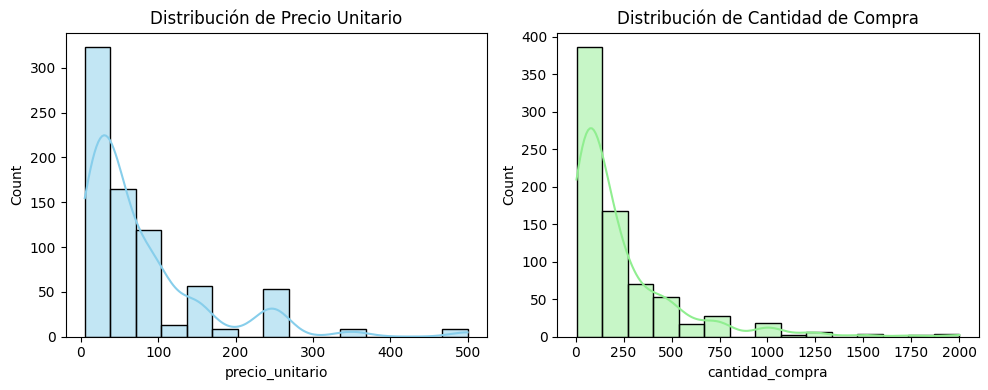

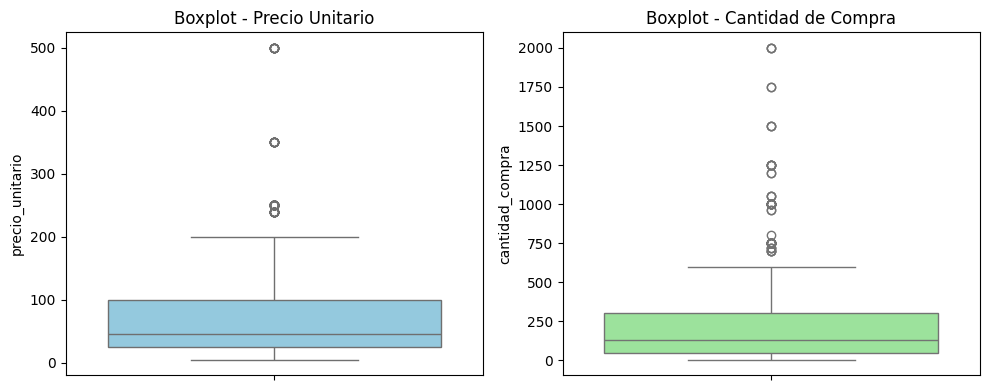

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estadísticos descriptivos básicos ---
print("📊 Estadísticos descriptivos de las variables no paramétricas:\n")
print(df_interes[["precio_unitario", "cantidad_compra"]].describe(percentiles=[.25, .5, .75]).T)

# --- Mediana, rango y valores únicos ---
print("\nMediana de cada variable:")
print(df_interes[["precio_unitario", "cantidad_compra"]].median())

print("\nValores únicos (primeros 10 por variable):")
for col in ["precio_unitario", "cantidad_compra"]:
    print(f"\n{col}: {df_interes[col].unique()[:10]}")

# --- Histogramas ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_interes["precio_unitario"], bins=15, kde=True, color="skyblue")
plt.title("Distribución de Precio Unitario")

plt.subplot(1,2,2)
sns.histplot(df_interes["cantidad_compra"], bins=15, kde=True, color="lightgreen")
plt.title("Distribución de Cantidad de Compra")
plt.tight_layout()
plt.show()

# --- Boxplots ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=df_interes["precio_unitario"], color="skyblue")
plt.title("Boxplot - Precio Unitario")

plt.subplot(1,2,2)
sns.boxplot(y=df_interes["cantidad_compra"], color="lightgreen")
plt.title("Boxplot - Cantidad de Compra")
plt.tight_layout()
plt.show()


📈 Matriz de correlación (Spearman):
                 precio_unitario  cantidad_compra
precio_unitario         1.000000         0.874111
cantidad_compra         0.874111         1.000000


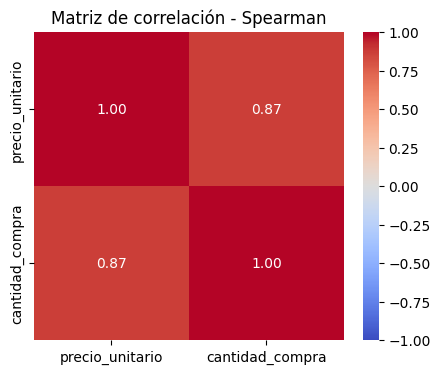


Coeficiente de correlación de Spearman: r = 0.8741, p-value = 0.0000
❌ Rechazamos H0: existe correlación significativa entre precio y cantidad comprada.


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#DataFrame con las variables de interés
datos_corr = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

# --- Matriz de correlación (Spearman) ---
corr = datos_corr.corr(method='spearman')
print("📈 Matriz de correlación (Spearman):")
print(corr)

# --- Visualización ---
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación - Spearman")
plt.show()

# --- Prueba de hipótesis de correlación ---
r, p = stats.spearmanr(datos_corr["precio_unitario"], datos_corr["cantidad_compra"])
print(f"\nCoeficiente de correlación de Spearman: r = {r:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("❌ Rechazamos H0: existe correlación significativa entre precio y cantidad comprada.")
else:
    print("✅ No se rechaza H0: no hay evidencia de correlación significativa.")


In [36]:
from scipy import stats

# Asegurarnos de usar solo valores válidos
datos_test = df_interes.dropna(subset=["precio_unitario", "cantidad_compra"])

# Prueba de hipótesis de correlación de Spearman
r, p = stats.spearmanr(datos_test["precio_unitario"], datos_test["cantidad_compra"])

print("=== Prueba de hipótesis: correlación Spearman ===")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Valor p (p-value): {p:.4f}")

if p < 0.05:
    print("\n❌ Rechazamos H₀: Existe correlación significativa entre el precio y la cantidad comprada.")
    if r < 0:
        print("➡ La relación es negativa: cuando aumenta el precio, la cantidad comprada tiende a disminuir.")
    else:
        print("➡ La relación es positiva: cuando aumenta el precio, también lo hace la cantidad comprada.")
else:
    print("\n✅ No se rechaza H₀: No hay evidencia suficiente de correlación significativa entre las variables.")


=== Prueba de hipótesis: correlación Spearman ===
Coeficiente de correlación (r): 0.8741
Valor p (p-value): 0.0000

❌ Rechazamos H₀: Existe correlación significativa entre el precio y la cantidad comprada.
➡ La relación es positiva: cuando aumenta el precio, también lo hace la cantidad comprada.


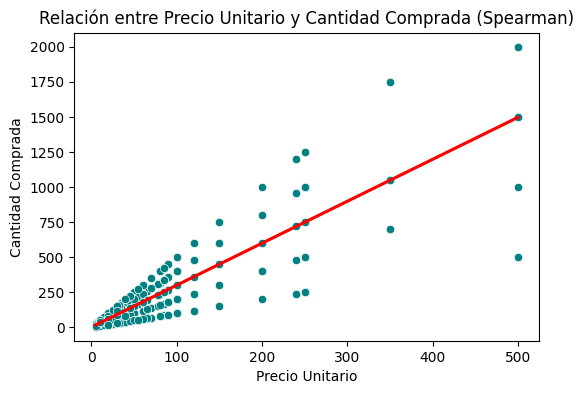

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x="precio_unitario", y="cantidad_compra", data=datos_test, color="teal")
sns.regplot(x="precio_unitario", y="cantidad_compra", data=datos_test,
            scatter=False, ci=None, color="red")
plt.title("Relación entre Precio Unitario y Cantidad Comprada (Spearman)")
plt.xlabel("Precio Unitario")
plt.ylabel("Cantidad Comprada")
plt.show()
